In [1]:
import random
import os, sys
import numpy as np
import pandas as pd
from scipy.signal import medfilt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from preprocess import *
from stats_util import *
from graph_util import *
from outliers_util import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading structures

In [2]:
year_qs = ['2012_1', '2013_1', '2014_1']
field_ys = ['pself', 'pother', 'token']
top_sims = {}
for year_q in year_qs:
    top_sims_year_q = load_top_sims(year_q)
    preprocess_top_sims(top_sims_year_q)
    top_sims.update(top_sims_year_q)

Factor for norming steps 1500
Factor for norming steps 1500
Factor for norming steps 1500


## Graph 95th percentile

In [4]:
norm_step_x, interp_y = get_percentiles(top_sims, 'norm_step', field_ys, max_factor=largest_factor, perc=95)
x, interp_whisk = get_upper_whiskers(top_sims, 'norm_step', field_ys, max_factor=largest_factor, factor=1.5)

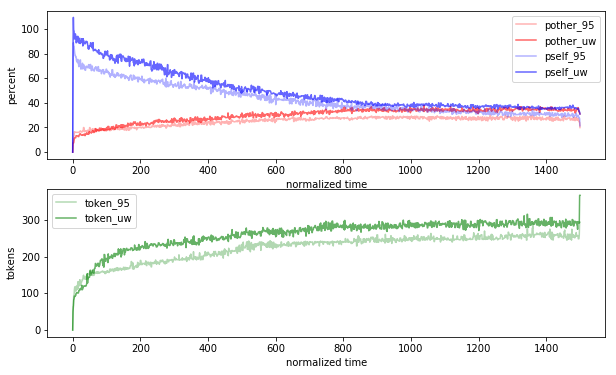

In [5]:
fig, axs = plt.subplots(2,1, figsize=(10, 6))
plot_outlier_lines(norm_step_x, interp_y, interp_whisk, axs)
for ax in axs:
    ax.legend()

axs[0].set_ylabel('percent')
axs[1].set_ylabel('tokens')
axs[0].set_xlabel('normalized time')
axs[1].set_xlabel('normalized time')
plt.show()

## Get outliers

In [6]:
top_sims_arr = top_sims_to_array(top_sims, 'norm_step', field_ys)
max_tokens, max_pothers = get_max_token_pother(top_sims_arr)

# No need to hack

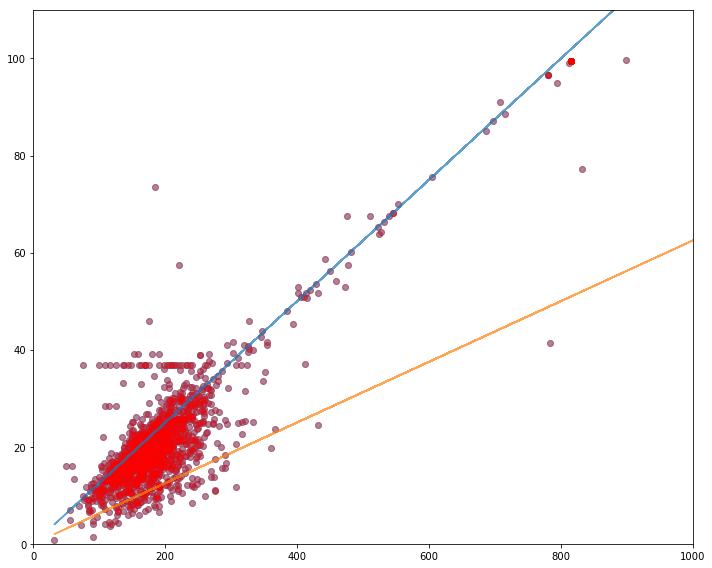

In [7]:
max_tokens, max_pothers = get_max_token_pother(top_sims_arr)
fig = plt.figure()
axs = plt.gca()
desired_slope = 50./400
axs.scatter(max_tokens, max_pothers, alpha=0.5)
axs.plot(max_tokens, desired_slope*max_tokens, alpha=0.7)
axs.plot(max_tokens, 0.5*desired_slope*max_tokens, alpha=0.7)

err = 10
def adjust_slopes(tokens, pothers):
    new_tokens, new_pothers = np.array(tokens), np.array(pothers)
    desired_resid = np.abs(pothers - tokens*desired_slope)
    double_resid = np.abs(pothers - tokens*0.5*desired_slope)
    use_double = err < desired_resid - double_resid # double resid is smaller by an error
    new_tokens[use_double] = tokens[use_double]/2
    return new_tokens, new_pothers
old_tokens, old_pothers = max_tokens, max_pothers
#new_tokens, new_pothers = adjust_slopes(old_tokens, old_pothers)
new_tokens, new_pothers = old_tokens, old_pothers
axs.scatter(new_tokens, new_pothers, alpha=0.3, c='r')

axs.set_xlim((0, 1000))
axs.set_ylim((0, 110))
fig.tight_layout()
max_tokens, max_pothers = new_tokens, new_pothers

{'boxes': [<matplotlib.lines.Line2D at 0x12e62ba90>],
 'caps': [<matplotlib.lines.Line2D at 0x12e639a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e647d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12e6476d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12e62bc90>,
  <matplotlib.lines.Line2D at 0x12e6393d0>]}

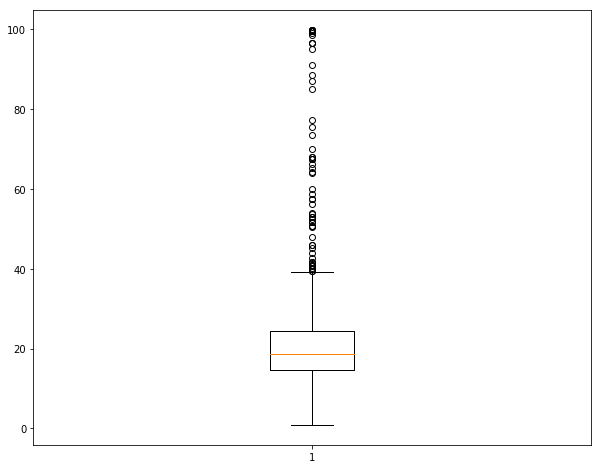

In [8]:
fig = plt.figure()
axs = plt.gca()
plt.boxplot(max_pothers)

320.5
39.1875
IQR factor: 1.5
217.0 148.0 69.0 44.5 320.5 95th 327.0
IQR factor: 1.5
24.39 14.525 9.865 -0.2725 39.1875 95th 39.992
IQR factor: 1.5
217.0 148.0 69.0 44.5 320.5 95th 327.0
IQR factor: 1.5
24.39 14.525 9.865 -0.2725 39.1875 95th 39.992
ellipse: (44.5, 320.5, -0.27250000000000441, 39.1875)
abs: (320.5, 39.1875)
Wrote outlier params to /Users/Lisa/Research/repos/socialTrajectory/top_sim/ell_outliers.conf
Wrote outlier params to /Users/Lisa/Research/repos/socialTrajectory/top_sim/abs_outliers.conf


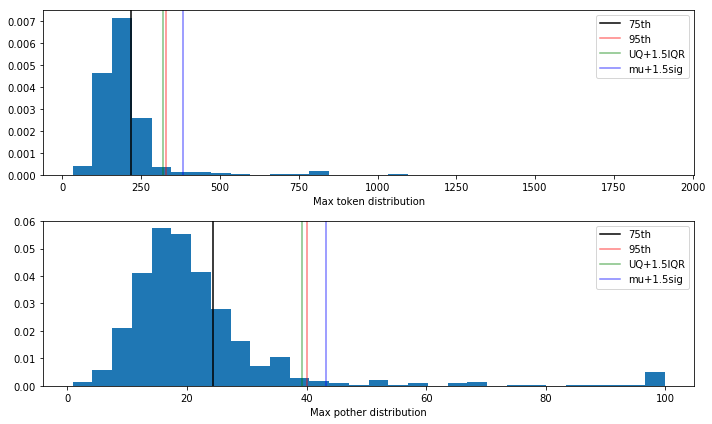

In [9]:


fig, axs = plt.subplots(2,1, figsize=(10, 6))
axs[0].hist(max_tokens, bins=30, normed=1)
axs[0].axvline(x=np.percentile(max_tokens, 75), c='k',label='75th')
axs[0].axvline(x=np.percentile(max_tokens, 95), c='r', alpha=0.5,label='95th')
print np.percentile(max_tokens, 75) + 1.5*(np.percentile(max_tokens,75) - np.percentile(max_tokens,25))
axs[0].axvline(x=np.percentile(max_tokens, 75) + 1.5*(np.percentile(max_tokens,75) - np.percentile(max_tokens,25)),c='g', alpha=0.5,label='UQ+1.5IQR')
axs[0].axvline(x=1.5*np.std(max_tokens)+np.mean(max_tokens), c='b', alpha=0.5,label='mu+1.5sig')
axs[0].set_xlabel('Max token distribution')
axs[0].legend()
axs[1].hist(max_pothers, bins=30, normed=1)
axs[1].axvline(x=np.percentile(max_pothers, 75), c='k',label='75th')
axs[1].axvline(x=np.percentile(max_pothers, 95), c='r', alpha=0.5,label='95th')
print np.percentile(max_pothers, 75) + 1.5*(np.percentile(max_pothers,75) - np.percentile(max_pothers,25))
axs[1].axvline(x=np.percentile(max_pothers, 75) + 1.5*(np.percentile(max_pothers,75) - np.percentile(max_pothers,25)),c='g', alpha=0.5,label='UQ+1.5IQR')
axs[1].axvline(x=1.5*np.std(max_pothers)+np.mean(max_pothers), c='b', alpha=0.5,label='mu+1.5sig')
axs[1].set_xlabel('Max pother distribution')
axs[1].legend()
fig.tight_layout()
IQR_factor = 1.5
coords_ell = get_ellipse_coords(max_tokens, max_pothers, factor=IQR_factor)
coords_abs = get_abs_coords(max_tokens, max_pothers, factor=IQR_factor)
print "ellipse:", coords_ell
print "abs:", coords_abs
save_ell_params(coords_ell)
save_abs_params(coords_abs)

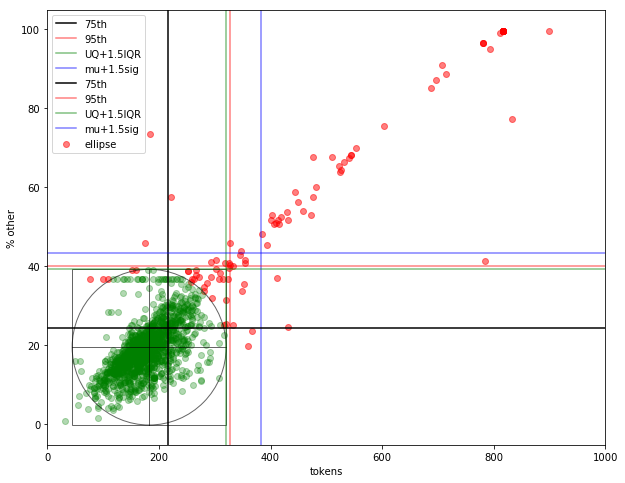

In [19]:
fig = plt.figure()
ax = plt.gca()
# for printing
# print '\n'.join(['%s\t%s' % (token, max_pother) for (token, max_pother) in zip(max_tokens, max_pothers)])
# graph
graph_max_outliers_ell(max_tokens, max_pothers, ax, coords_ell)
#graph_max_outliers_abs(max_tokens, max_pothers, ax, coords_abs)
#graph_max(max_tokens, max_pothers, ax)

# adjust axes
ax.legend(loc='upper left')
ax.set_ylabel('% other')
ax.set_xlabel('tokens')
ax.set_xlim([0, 1000])




ax.axvline(x=np.percentile(max_tokens, 75), c='k',label='75th')
ax.axvline(x=np.percentile(max_tokens, 95), c='r', alpha=0.5,label='95th')
ax.axvline(x=np.percentile(max_tokens, 75) + 1.5*(np.percentile(max_tokens,75) - np.percentile(max_tokens,25)),c='g', alpha=0.5,label='UQ+1.5IQR')
ax.axvline(x=1.5*np.std(max_tokens)+np.mean(max_tokens), c='b', alpha=0.5,label='mu+1.5sig')
ax.axhline(y=np.percentile(max_pothers, 75), c='k',label='75th')
ax.axhline(y=np.percentile(max_pothers, 95), c='r', alpha=0.5,label='95th')
ax.axhline(y=np.percentile(max_pothers, 75) + 1.5*(np.percentile(max_pothers,75) - np.percentile(max_pothers,25)),c='g', alpha=0.5,label='UQ+1.5IQR')
ax.axhline(y=1.5*np.std(max_pothers)+np.mean(max_pothers), c='b', alpha=0.5,label='mu+1.5sig')
ax.legend()


/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


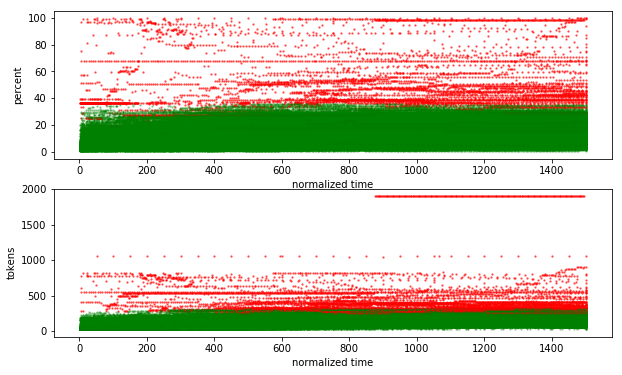

In [11]:
def plot_outliers_over_time(top_sims_arr, coords, axs, use_abs=False):
    alpha_out = 0.5
    c_in, alpha_in = 'g', 0.3
    outlier_fn = get_ellipse_outliers
    c_out = 'r'
    if use_abs:
        outlier_fn = get_abs_outliers
        c_out = 'b'

    for uname in top_sims_arr:
        x, ys = top_sims_arr[uname]
        x = np.array(x)
        pselfs, tokens, pothers = np.array(ys['pself']), np.array(ys['token']), np.array(ys['pother'])
        outliers, inliers = outlier_fn(tokens, pothers, coords)
        axs[0].scatter(x[outliers], pothers[outliers], c=c_out, alpha=alpha_out, s=2)
        axs[0].scatter(x[inliers], pothers[inliers], c=c_in, alpha=alpha_in, s=2)
        axs[1].scatter(x[outliers], tokens[outliers], c=c_out, alpha=alpha_out, s=2)
        axs[1].scatter(x[inliers], tokens[inliers], c=c_in, alpha=alpha_in, s=2)

fig, axs = plt.subplots(2,1, figsize=(10, 6))
plot_outliers_over_time(top_sims_arr, coords_ell, axs)
for ax in axs:
    ax.legend()

axs[0].set_ylabel('percent')
axs[1].set_ylabel('tokens')
axs[0].set_xlabel('normalized time')
axs[1].set_xlabel('normalized time')
plt.show()

## Save outliers

In [15]:
def get_and_save_outliers(year_q, use_abs=False, adjust=False):
    top_sims_yq = load_top_sims(year_q)
    if use_abs:
        coords = load_params('abs')
    else:
        coords = load_params('ell')
    field_ys = ['pself', 'pother', 'token', 'type_other']
    top_sims_arr_yq = top_sims_to_array(top_sims_yq, 'time', field_ys)
    outlier_dict_yq = get_outlier_stats(top_sims_arr_yq, coords, use_abs=use_abs, adjust=False)
    save_outliers(year_q, outlier_dict_yq)
    
print "Using adjusted slopes (divides tokens by two if needed)"
for year_q in year_qs:
    get_and_save_outliers(year_q, use_abs=False, adjust=False)

Using adjusted slopes (divides tokens by two if needed)
[44.5, 320.5, -0.2725, 39.1875]
Wrote outliers to /Users/Lisa/Research/repos/socialTrajectory/top_sim/2012_1_outliers.csv
[44.5, 320.5, -0.2725, 39.1875]
Wrote outliers to /Users/Lisa/Research/repos/socialTrajectory/top_sim/2013_1_outliers.csv
[44.5, 320.5, -0.2725, 39.1875]
Wrote outliers to /Users/Lisa/Research/repos/socialTrajectory/top_sim/2014_1_outliers.csv
